In [1]:
import tensorflow as tf
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from time import time#匯入時間模組
import random
import random
import PIL
from PIL import Image

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


20
2000
2000


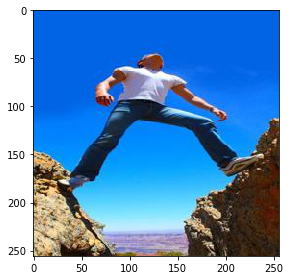

5.0


In [2]:
list1 = [7, 48, 62, 66, 67, 81, 94,110,150,194,205, 209, 223, 232, 233, 237, 243,266,307,330]#新的20個景點
print(len(list1))
dict1 = {7:0, 48:1, 62:2, 66:3, 67:4, 81:5, 94:6, 110:7, 150:8, 194:9, 205:10, 209:11, 223:12, 232:13, 233:14, 237:15, 243:16, 266:17, 307:18, 330:19}
image_filename_list = []#建立存放驗證圖片的list
label_list = []#存放label的list

## Open file
f = open('/Users/cloud/Desktop/Places365-Standard/filelist_places365-standard/places365_val.txt','r')
lines = f.readlines()#读取全部内容  

## 用 while 逐行讀取檔案內容，直至檔案結尾
for line in lines:
    filenamesplit = line.split(' ')
    number1 = int(filenamesplit[1])
    if number1 in list1:
        image_filename_list.append(filenamesplit[0])#放入image的檔案名
        #print(filenamesplit[0])
        label_list.append(float(dict1[number1]))#放入label
        #print(float(dict1[number1]))
        
f.close()

print(len(image_filename_list))#每個景點有100張驗證資料，所以共有100x20=2000張
print(len(label_list))

testImg = io.imread('/Users/cloud/Desktop/taiwan_typical_20_val/val_256/' + image_filename_list[0])
# 顯示點陣圖
p1 = io.imshow(testImg)
plt.show(p1)

print(label_list[0])

# 擴增圖片

In [3]:

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# Plot inline
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,#隨機旋轉的度數範圍
    width_shift_range=0.2,#在圖像平面上對圖像以一定方式進行寬度平移 = width_shift_range=[-0.2, 0, 0.2]
    height_shift_range=0.2,#在圖像平面上對圖像以一定方式進行高度平移 = hight_shift_range=[-0.2, 0, 0.2]
    shear_range=0.2,#剪切強度（以弧度逆時針方向剪切角度）
    zoom_range=0.2,#隨機縮放範圍 [lower, upper] = [1-zoom_range, 1+zoom_range]
    horizontal_flip=True,#隨機水平翻轉
    fill_mode='nearest')#fill_mode: {"constant", "nearest", "reflect" or "wrap"} 之一。默認为 'nearest'。输入邊界以外的點根據给定的模式填充：'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k), 'nearest': aaaaaaaa|abcd|dddddddd', reflect': abcddcba|abcd|dcbaabcd', wrap': abcdabcd|abcd|abcdabcd


Using TensorFlow backend.


In [4]:

#建立2000個空資料夾
import os
#'/Users/cloud/Desktop/augment_2000/'
for i in range(2000):
    name2 = str(i+1)
    while(len(name2)<8):
        name2 = "0" + name2
    path = '/Users/cloud/Desktop/augment_4000/' + name2
    if not os.path.isdir(path):
        os.mkdir(path)

In [ ]:

count = 0
startTime = time()#開始計算時間
for label in label_list:
    name2 = str(count+1)
    while(len(name2)<8):
        name2 = "0" + name2
    name3 = ".jpg"
    img = load_img('/Users/cloud/Desktop/taiwan_typical_20_val_resized/' +name2 + name3)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (224, 224, 3)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 224, 224, 3)
    
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir='/Users/cloud/Desktop/augment_4000/'+name2, save_prefix= name2 , save_format='jpg'):
        plt.subplot(5,4,1 + i)
        plt.axis("off")
        augImage = batch[0]
        augImage = augImage.astype('float32')
        augImage /= 255
        plt.imshow(augImage)
        
        i += 1
        if i > 0:
            break  # otherwise the generator would loop indefinitely
            
    print(count)
    count = count + 1

duration = time() - startTime
print('Finished 2000 image augmentation , time: ', duration)

0
1
2
3
4
5
6
7


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
28

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
Finished 2000 image augmentation , time:  59.54000496864319


# 取得所有擴增圖片路徑

In [3]:
#取得資料夾內所有圖片路徑
from os import walk
from os.path import join

# 指定要列出所有檔案的目錄
mypath = '/Users/cloud/Desktop/augment_4000/00000001'
list1 = []#存放圖片路徑的list

# 遞迴列出所有檔案的絕對路徑
for i in range(0, 2000):
    namefile = str(i+1)
    while(len(namefile)<8):
        namefile = "0" + namefile
    mypath = '/Users/cloud/Desktop/augment_4000/' + namefile
    for root, dirs, files in walk(mypath):
        for f in files:
            fullpath = join(root, f)
            print(fullpath)
            list1.append(fullpath)
print(len(list1))
print(len(label_list))

/Users/cloud/Desktop/augment_4000/00000001/00000001_0_1575.jpg
/Users/cloud/Desktop/augment_4000/00000002/00000002_0_3257.jpg
/Users/cloud/Desktop/augment_4000/00000003/00000003_0_3012.jpg
/Users/cloud/Desktop/augment_4000/00000004/00000004_0_123.jpg
/Users/cloud/Desktop/augment_4000/00000005/00000005_0_1366.jpg
/Users/cloud/Desktop/augment_4000/00000006/00000006_0_48.jpg
/Users/cloud/Desktop/augment_4000/00000007/00000007_0_1624.jpg
/Users/cloud/Desktop/augment_4000/00000008/00000008_0_7696.jpg
/Users/cloud/Desktop/augment_4000/00000009/00000009_0_1280.jpg
/Users/cloud/Desktop/augment_4000/00000010/00000010_0_7486.jpg
/Users/cloud/Desktop/augment_4000/00000011/00000011_0_9883.jpg
/Users/cloud/Desktop/augment_4000/00000012/00000012_0_309.jpg
/Users/cloud/Desktop/augment_4000/00000013/00000013_0_8261.jpg
/Users/cloud/Desktop/augment_4000/00000014/00000014_0_2761.jpg
/Users/cloud/Desktop/augment_4000/00000015/00000015_0_8063.jpg
/Users/cloud/Desktop/augment_4000/00000016/00000016_0_4825.

/Users/cloud/Desktop/augment_4000/00000751/00000751_0_3075.jpg
/Users/cloud/Desktop/augment_4000/00000752/00000752_0_3580.jpg
/Users/cloud/Desktop/augment_4000/00000753/00000753_0_4403.jpg
/Users/cloud/Desktop/augment_4000/00000754/00000754_0_2880.jpg
/Users/cloud/Desktop/augment_4000/00000755/00000755_0_9263.jpg
/Users/cloud/Desktop/augment_4000/00000756/00000756_0_3009.jpg
/Users/cloud/Desktop/augment_4000/00000757/00000757_0_4814.jpg
/Users/cloud/Desktop/augment_4000/00000758/00000758_0_2390.jpg
/Users/cloud/Desktop/augment_4000/00000759/00000759_0_4807.jpg
/Users/cloud/Desktop/augment_4000/00000760/00000760_0_7450.jpg
/Users/cloud/Desktop/augment_4000/00000761/00000761_0_1966.jpg
/Users/cloud/Desktop/augment_4000/00000762/00000762_0_1242.jpg
/Users/cloud/Desktop/augment_4000/00000763/00000763_0_800.jpg
/Users/cloud/Desktop/augment_4000/00000764/00000764_0_9083.jpg
/Users/cloud/Desktop/augment_4000/00000765/00000765_0_5174.jpg
/Users/cloud/Desktop/augment_4000/00000766/00000766_0_49

/Users/cloud/Desktop/augment_4000/00001560/00001560_0_3848.jpg
/Users/cloud/Desktop/augment_4000/00001561/00001561_0_4580.jpg
/Users/cloud/Desktop/augment_4000/00001562/00001562_0_2304.jpg
/Users/cloud/Desktop/augment_4000/00001563/00001563_0_2130.jpg
/Users/cloud/Desktop/augment_4000/00001564/00001564_0_3934.jpg
/Users/cloud/Desktop/augment_4000/00001565/00001565_0_400.jpg
/Users/cloud/Desktop/augment_4000/00001566/00001566_0_9576.jpg
/Users/cloud/Desktop/augment_4000/00001567/00001567_0_7302.jpg
/Users/cloud/Desktop/augment_4000/00001568/00001568_0_8037.jpg
/Users/cloud/Desktop/augment_4000/00001569/00001569_0_1170.jpg
/Users/cloud/Desktop/augment_4000/00001570/00001570_0_3474.jpg
/Users/cloud/Desktop/augment_4000/00001571/00001571_0_5439.jpg
/Users/cloud/Desktop/augment_4000/00001572/00001572_0_2497.jpg
/Users/cloud/Desktop/augment_4000/00001573/00001573_0_1483.jpg
/Users/cloud/Desktop/augment_4000/00001574/00001574_0_5966.jpg
/Users/cloud/Desktop/augment_4000/00001575/00001575_0_97

# 將擴增資料Image和Label做正規化(除255.0)並以numpy(.npy)檔形式儲存

In [4]:
dictLabel = {0:[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  1:[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  2:[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  3:[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  4:[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  5:[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  6:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  7:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  8:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  9:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  10:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  11:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  12:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  13:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  14:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,],
                  15:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,],
                  16:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,],
                  17:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,],
                  18:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,],
                  19:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,]}

imgonehot_val = np.zeros(shape=(2000, 224, 224, 3))#存放驗證圖片的2000筆一維陣列
labelonehot_val = np.zeros(shape=(2000,20))#存放驗證標籤的2000筆一維陣列

count = 0
startTime = time()#開始計算時間
for label in label_list:
    path = str(list1[count])
    image = io.imread(path)#取得圖片值
    image = image.astype('float32')/255.0#將100筆圖片全部標準化(介於0~1之間)
    imgonehot_val[count] = image
    labelonehot_val[count] = dictLabel[label]#將label轉成one-hot encoding
    print(count)
    count = count + 1

np.save('/Users/cloud/Desktop/numpydataKeras_20_val_aug/imgonehot_val_aug_2000.npy', imgonehot_val )
np.save('/Users/cloud/Desktop/numpydataKeras_20_val_aug/labelonehot_val_aug_2000.npy', labelonehot_val )  
duration = time() - startTime
print('Finished 2000 image label val, time: ', duration)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
Finished 2000 image label val, time:  17.67072820663452
